In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# NLP
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence
from gensim.models import Word2Vec

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential
from keras.utils import plot_model
# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Embedding
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply
# Deep Learning Model - Keras - LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D
# Visualization


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
books_neg = pd.read_csv("/content/drive/My Drive/LSTM/books_negative.csv")
books_pos = pd.read_csv("/content/drive/My Drive/LSTM/books_positive.csv")
dvd_neg = pd.read_csv("/content/drive/My Drive/LSTM/dvd_negative.csv")
dvd_pos = pd.read_csv("/content/drive/My Drive/LSTM/dvd_positive.csv")
ele_neg = pd.read_csv("/content/drive/My Drive/LSTM/electronics_negative.csv")
ele_pos = pd.read_csv("/content/drive/My Drive/LSTM/electronics_positive.csv")
kit_neg = pd.read_csv("/content/drive/My Drive/LSTM/kitchen_negative.csv")
kit_pos = pd.read_csv("/content/drive/My Drive/LSTM/kitchen_positive.csv")


In [4]:
books_neg['label'] = 0 
books_pos['label'] = 1
books = pd.concat([books_neg,books_pos],axis = 0)
books['domain'] = 'books'
dvd_neg['label'] = 0
dvd_pos['label'] = 1
dvd = pd.concat([dvd_pos, dvd_neg],axis = 0)
dvd['domain'] = 'dvd'
ele_neg['label'] = 0
ele_pos['label'] = 1
ele = pd.concat([ele_neg, ele_pos],axis = 0)
ele['domain'] = 'electronics'
kit_neg['label'] = 0
kit_pos['label'] = 1
kit = pd.concat([kit_neg, kit_pos],axis = 0)
kit['domain'] = 'kitchen'
alldata = pd.concat([books,dvd,ele,kit])

In [5]:
books =books.reset_index(drop=True)
dvd =dvd.reset_index(drop=True)
ele =ele.reset_index(drop=True)
kit =kit.reset_index(drop=True)

In [6]:
x_books = books['review_text']
y_books = books['label']

x_dvd = dvd['review_text']
y_dvd = dvd['label']

x_ele = ele['review_text']
y_ele = ele['label']

x_kit = kit['review_text']
y_kit = kit['label']

In [7]:
def clean_doc(doc):
    #split into words
    tokens = word_tokenize(doc)
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    #prepare regex for char filtering
    re_punc =re.compile('[%s]'% re.escape(string.punctuation))
    #remove punctuation
    stripped =[re_punc.sub('',w) for w in tokens]
    #filter out stop words
    #stop_words = set(stopwords.words('english'))
    #words =[w for w in words if not w in stop_words]
    #remove remaining tokens that are not alphabetic
    words = [w for w in stripped if w.isalpha()]
    #filter out short tokens
    tokens = [word for word in words if len(word)>1]
    return tokens

In [8]:
text_books = []
for m in range(0,len(x_books)):
    X = ''.join(str(i)for i in x_books[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_books.append(trainx)

text_dvd = []
for m in range(0,len(x_dvd)):
    X = ''.join(str(i)for i in x_dvd[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_dvd.append(trainx)


text_ele = []
for m in range(0,len(x_ele)):
    X = ''.join(str(i)for i in x_ele[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_ele.append(trainx)


text_kit = []
for m in range(0,len(x_kit)):
    X = ''.join(str(i)for i in x_kit[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_kit.append(trainx)

In [9]:
#tokens
tokens_b = []
for m in range(0,len(x_books)):
    X = ''.join(str(i)for i in x_books[m])
    te = clean_doc(X)
    tokens_b.append(te)

tokens_d = []
for m in range(0,len(x_dvd)):
    X = ''.join(str(i)for i in x_dvd[m])
    te = clean_doc(X)
    tokens_d.append(te)

tokens_e = []
for m in range(0,len(x_ele)):
    X = ''.join(str(i)for i in x_ele[m])
    te = clean_doc(X)
    tokens_e.append(te)

tokens_k = []
for m in range(0,len(x_kit)):
    X = ''.join(str(i)for i in x_kit[m])
    te = clean_doc(X)
    tokens_k.append(te)

In [10]:
#define the word2vec model
w2v_model_b = Word2Vec(tokens_b,min_count=1,size=100,workers=4)
#convert text data to vector
x_wv_b=[]
for i in range(len(tokens_b)): 
    vector=w2v_model_b.wv[tokens_b[i]]
    x_wv_b.append(vector)

In [11]:
w2v_model_d = Word2Vec(tokens_d,min_count=1,size=100,workers=4)
x_wv_d=[]
for i in range(len(tokens_d)): 
    vector=w2v_model_d.wv[tokens_d[i]]
    x_wv_d.append(vector)

In [12]:
w2v_model_e = Word2Vec(tokens_e,min_count=1,size=100,workers=4)
x_wv_e=[]
for i in range(len(tokens_e)): 
    vector=w2v_model_e.wv[tokens_e[i]]
    x_wv_e.append(vector)

In [13]:
w2v_model_k = Word2Vec(tokens_k,min_count=1,size=100,workers=4)
x_wv_k=[]
for i in range(len(tokens_k)): 
    vector=w2v_model_k.wv[tokens_k[i]]
    x_wv_k.append(vector)


In [14]:
X_wv_b=np.array(x_wv_b)
X_wv_d=np.array(x_wv_d)   
X_wv_e=np.array(x_wv_e)
X_wv_k=np.array(x_wv_k)

In [15]:
# calculate the maximum sequence length
max_words_b = len(set(" ".join(text_books).split()))
max_len_b = max([len(s.split()) for s in text_books])

max_words_d = len(set(" ".join(text_dvd).split()))
max_len_d = max([len(s.split()) for s in text_dvd])

max_words_e = len(set(" ".join(text_ele).split()))
max_len_e = max([len(s.split()) for s in text_ele])

max_words_k = len(set(" ".join(text_kit).split()))
max_len_k = max([len(s.split()) for s in text_kit])

max_words = max(max_words_b,max_words_d,max_words_e,max_words_k)
#max_len = max(max_len_b,max_len_d,max_len_e,max_len_k)


In [16]:
max_len = 120

In [17]:
# pad the vectors
X_wv_b_padded=pad_sequences(X_wv_b,  maxlen=max_len, padding='post')
X_wv_d_padded=pad_sequences(X_wv_d,  maxlen=max_len, padding='post')
X_wv_e_padded=pad_sequences(X_wv_e,  maxlen=max_len, padding='post')
X_wv_k_padded=pad_sequences(X_wv_k,  maxlen=max_len, padding='post')

In [18]:
print(X_wv_k.shape)
print(X_wv_k_padded.shape)

(2000,)
(2000, 120, 100)


In [19]:
label_encoder = LabelEncoder()
y_b = label_encoder.fit_transform(y_books)
y_b = to_categorical(y_books)
Y_b = pad_sequences(y_b,  maxlen=max_len, padding='post')
Y_b = to_categorical(Y_b)
Y_books = pad_sequences(Y_b,  maxlen=max_len, padding='post')
Y_books.shape

(2000, 120, 2)

In [20]:
label_encoder = LabelEncoder()
y_d = label_encoder.fit_transform(y_dvd)
y_d = to_categorical(y_dvd)
Y_d = pad_sequences(y_d,  maxlen=max_len, padding='post')
Y_d = to_categorical(Y_d)
Y_dvd = pad_sequences(Y_d,  maxlen=max_len, padding='post')
Y_dvd.shape

(2000, 120, 2)

In [21]:
y_e = label_encoder.fit_transform(y_ele)
y_e = to_categorical(y_ele)
Y_e = pad_sequences(y_e,  maxlen=max_len, padding='post')
Y_e = to_categorical(Y_e)
Y_ele = pad_sequences(Y_e,  maxlen=max_len, padding='post')
Y_ele.shape

(2000, 120, 2)

In [22]:
y_k = label_encoder.fit_transform(y_kit)
y_k = to_categorical(y_kit)
Y_k = pad_sequences(y_k,  maxlen=max_len, padding='post')
Y_k = to_categorical(Y_k)
Y_kit = pad_sequences(Y_k,  maxlen=max_len, padding='post')
Y_kit.shape

(2000, 120, 2)

In [24]:
#split to validation and training
#X_train_b, X_valid_b = X_wv_b_padded[:1700], X_wv_b_padded[1700:]
#Y_train_b, Y_valid_b = Y_books[:1700], Y_books[1700:]

In [23]:
# define the LSTM model
def bi_LSTM(max_len,mode):
    model = Sequential()
    model.add(Bidirectional(LSTM(100,return_sequences=True),merge_mode=mode))
    model.add(TimeDistributed(Dense(2, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.build(input_shape=(None,120,100))
    model.summary()
    plot_model(model, to_file='bi_LSTM.png', show_shapes=True)
    return model

In [24]:
model_bi_LSTM = bi_LSTM(max_len,'ave')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 120, 100)          160800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 120, 2)            202       
Total params: 161,002
Trainable params: 161,002
Non-trainable params: 0
_________________________________________________________________


In [25]:
# fit network books to dvd
history1 = model_bi_LSTM.fit(X_wv_b_padded, Y_books, validation_data=(X_wv_d_padded, Y_dvd),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 14s 7ms/step - loss: 0.3241 - accuracy: 0.9403 - val_loss: 0.0510 - val_accuracy: 0.9917
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0375 - accuracy: 0.9917 - val_loss: 0.0321 - val_accuracy: 0.9917
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0307 - accuracy: 0.9917 - val_loss: 0.0283 - val_accuracy: 0.9917
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0253 - val_accuracy: 0.9917
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.0235 - val_accuracy: 0.9917
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0230 - accuracy: 0.9917 - val_loss: 0.0223 - val_accuracy: 0.9917
Epoch 7/100
2000/2000 [==============================] - 13s 6ms/step - loss

In [26]:
# fit network books to electronics
history2 = model_bi_LSTM.fit(X_wv_b_padded, Y_books, validation_data=(X_wv_e_padded, Y_ele),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0117 - accuracy: 0.9925 - val_loss: 0.0123 - val_accuracy: 0.9917
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0117 - accuracy: 0.9925 - val_loss: 0.0123 - val_accuracy: 0.9916
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0117 - accuracy: 0.9925 - val_loss: 0.0122 - val_accuracy: 0.9917
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0116 - accuracy: 0.9926 - val_loss: 0.0122 - val_accuracy: 0.9917
Epoch 5/100
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0116 - accuracy: 0.9926 - val_loss: 0.0123 - val_accuracy: 0.9916
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0116 - accuracy: 0.9925 - val_loss: 0.0122 - val_accuracy: 0.9916
Epoch 7/100
2000/2000 [==============================] - 13s 6ms/step - loss

In [31]:
# fit network books to kitchen appliance
history3 = model_bi_LSTM.fit(X_wv_b_padded, Y_books, validation_data=(X_wv_k_padded, Y_kit),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0169 - accuracy: 0.9923 - val_loss: 0.0146 - val_accuracy: 0.9919
Epoch 2/100
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0118 - accuracy: 0.9929 - val_loss: 0.0137 - val_accuracy: 0.9917
Epoch 3/100
1920/2000 [===========================>..] - ETA: 0s - loss: 0.0111 - accuracy: 0.9934

KeyboardInterrupt: ignored

In [ ]:
# fit network dvd to books
history4 = model_bi_LSTM.fit(X_wv_d_padded, Y_dvd, validation_data=(X_wv_b_padded, Y_books),batch_size=128,epochs=100)

In [29]:
# fit network dvd to electronics
history5 = model_bi_LSTM.fit(X_wv_d_padded, Y_dvd, validation_data=(X_wv_e_padded, Y_ele),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0060 - accuracy: 0.9974 - val_loss: 0.0149 - val_accuracy: 0.9916
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0059 - accuracy: 0.9975 - val_loss: 0.0148 - val_accuracy: 0.9916
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0055 - accuracy: 0.9977 - val_loss: 0.0153 - val_accuracy: 0.9916
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.0150 - val_accuracy: 0.9916
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.0154 - val_accuracy: 0.9916
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.0152 - val_accuracy: 0.9916
Epoch 7/100
2000/2000 [==============================] - 13s 6ms/step - loss

In [46]:
# fit network dvd to kitchen appliance
history6 = model_bi_LSTM.fit(X_wv_d_padded, Y_dvd, validation_data=(X_wv_k_padded, Y_kit), batch_size=128, epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0099 - accuracy: 0.9945 - val_loss: 0.0259 - val_accuracy: 0.9920
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0098 - accuracy: 0.9946 - val_loss: 0.0268 - val_accuracy: 0.9919
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0093 - accuracy: 0.9950 - val_loss: 0.0288 - val_accuracy: 0.9920
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0090 - accuracy: 0.9953 - val_loss: 0.0302 - val_accuracy: 0.9919
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0086 - accuracy: 0.9956 - val_loss: 0.0296 - val_accuracy: 0.9919
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0083 - accuracy: 0.9959 - val_loss: 0.0295 - val_accuracy: 0.9919
Epoch 7/100
2000/2000 [==============================] - 13s 6ms/step - loss

In [42]:
# fit network electronics to books
history7 = model_bi_LSTM.fit(X_wv_e_padded, Y_ele, validation_data=(X_wv_b_padded, Y_books),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0125 - accuracy: 0.9915 - val_loss: 0.0115 - val_accuracy: 0.9931
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0117 - accuracy: 0.9921 - val_loss: 0.0114 - val_accuracy: 0.9930
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0115 - accuracy: 0.9923 - val_loss: 0.0116 - val_accuracy: 0.9928
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0114 - accuracy: 0.9925 - val_loss: 0.0117 - val_accuracy: 0.9929
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0114 - accuracy: 0.9926 - val_loss: 0.0117 - val_accuracy: 0.9928
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0113 - accuracy: 0.9928 - val_loss: 0.0117 - val_accuracy: 0.9929
Epoch 7/100
2000/2000 [==============================] - 13s 6ms/step - loss

In [43]:
# fit network electronics to dvd
history8 = model_bi_LSTM.fit(X_wv_e_padded, Y_ele, validation_data=(X_wv_d_padded, Y_dvd),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0224 - val_accuracy: 0.9928
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0227 - val_accuracy: 0.9927
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0225 - val_accuracy: 0.9928
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0233 - val_accuracy: 0.9926
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0242 - val_accuracy: 0.9927
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0239 - val_accuracy: 0.9927
Epoch 7/100
2000/2000 [==============================] - 13s 6ms/step - loss

In [44]:
# fit network electronics to kitchen appliance
history9 = model_bi_LSTM.fit(X_wv_e_padded, Y_ele, validation_data=(X_wv_k_padded, Y_kit),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 7.8248e-05 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9917
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 7.7467e-05 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 0.9916
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 7.5113e-05 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9916
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 7.3639e-05 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9917
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 7.1552e-05 - accuracy: 1.0000 - val_loss: 0.0408 - val_accuracy: 0.9917
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 7.0191e-05 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9917
Epoch 7/100
2000/2000 [=============================

In [71]:
# fit network kitchen appliance to books
history10 = model_bi_LSTM.fit(X_wv_k_padded, Y_kit, validation_data=(X_wv_b_padded, Y_books),batch_size=128,epochs=100)

2000/2000 [==============================] - 13s 7ms/step - loss: 0.0051 - accuracy: 0.9978 - val_loss: 0.0315 - val_accuracy: 0.9919
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0050 - accuracy: 0.9979 - val_loss: 0.0319 - val_accuracy: 0.9919
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0050 - accuracy: 0.9978 - val_loss: 0.0321 - val_accuracy: 0.9918
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0050 - accuracy: 0.9978 - val_loss: 0.0314 - val_accuracy: 0.9919
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0047 - accuracy: 0.9981 - val_loss: 0.0321 - val_accuracy: 0.9919
Epoch 6/100
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0045 - accuracy: 0.9980 - val_loss: 0.0326 - val_accuracy: 0.9919
Epoch 7/100
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0047 - accuracy: 0.9980 - val_loss: 0.0320 - val_accurac

In [74]:
# fit network kitchen appliance to dvd
history11 = model_bi_LSTM.fit(X_wv_k_padded, Y_kit, validation_data=(X_wv_d_padded, Y_dvd),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.0383 - val_accuracy: 0.9920
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0383 - val_accuracy: 0.9920
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.0382 - val_accuracy: 0.9920
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0383 - val_accuracy: 0.9920
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0383 - val_accuracy: 0.9920
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0378 - val_accuracy: 0.9919
Epoch 7/100
2000/2000 [==============================] - 13s 6ms/step - loss

In [49]:
# fit network kitchen appliance to electronics
history12 = model_bi_LSTM.fit(X_wv_k_padded, Y_kit, validation_data=(X_wv_e_padded, Y_ele),batch_size=128,epochs=100)

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0102 - accuracy: 0.9943 - val_loss: 0.0151 - val_accuracy: 0.9923
Epoch 2/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0101 - accuracy: 0.9942 - val_loss: 0.0152 - val_accuracy: 0.9923
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0099 - accuracy: 0.9945 - val_loss: 0.0153 - val_accuracy: 0.9923
Epoch 4/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0100 - accuracy: 0.9943 - val_loss: 0.0154 - val_accuracy: 0.9923
Epoch 5/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0099 - accuracy: 0.9943 - val_loss: 0.0154 - val_accuracy: 0.9924
Epoch 6/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.0099 - accuracy: 0.9945 - val_loss: 0.0157 - val_accuracy: 0.9923
Epoch 7/100
2000/2000 [==============================] - 13s 7ms/step - loss

In [75]:
def plot_performance(history=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = 0.99
    max_y = 1.00


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]
   

    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    plt.show()

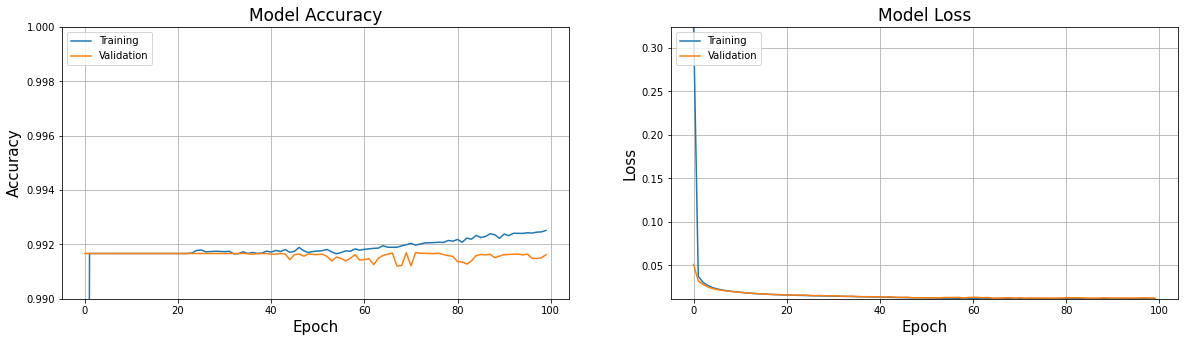

In [77]:
plot_performance(history=history1)

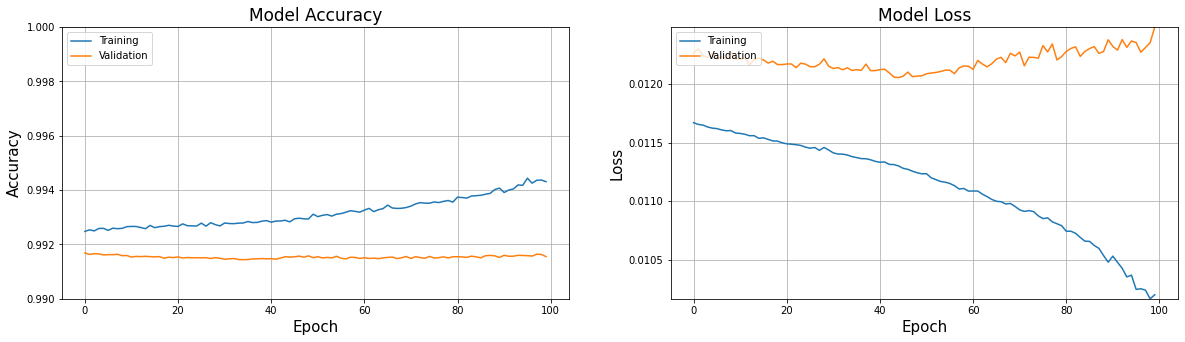

In [79]:
plot_performance(history=history2)

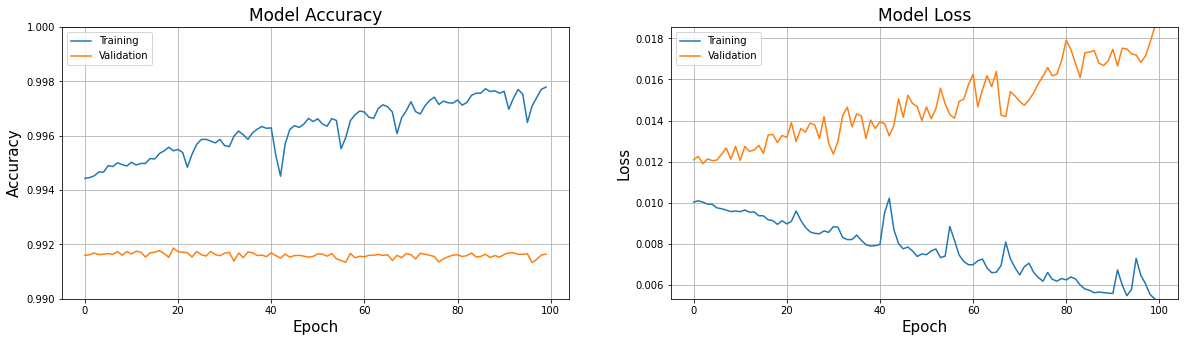

In [81]:
plot_performance(history=history3)

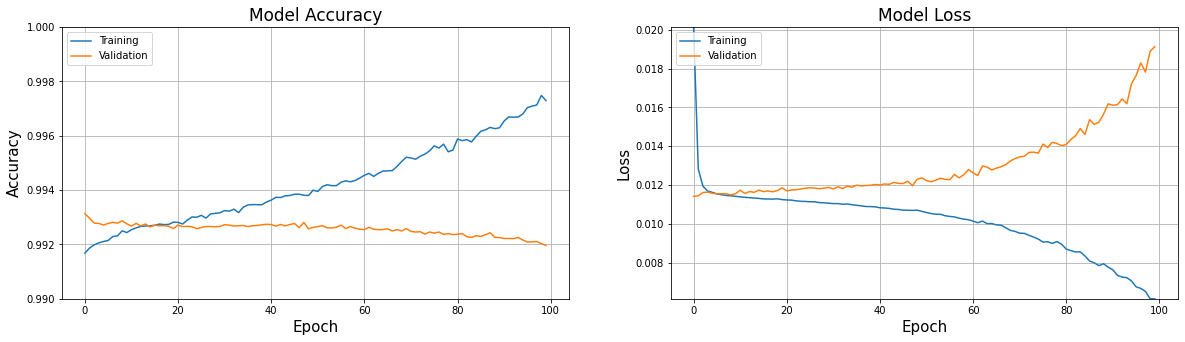

In [82]:
plot_performance(history=history4)

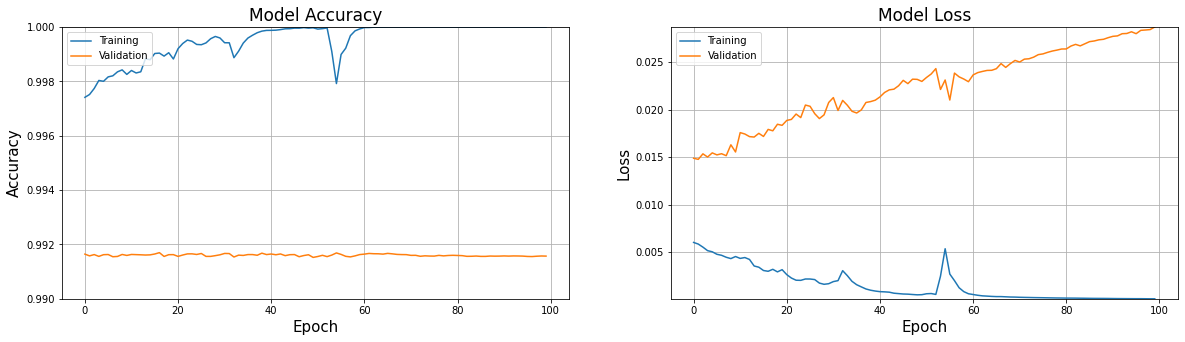

In [83]:
plot_performance(history=history5)

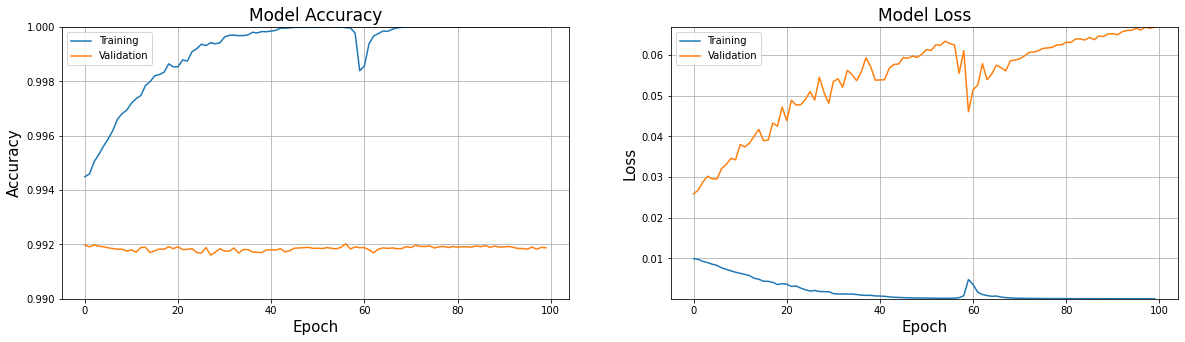

In [84]:
plot_performance(history=history6)

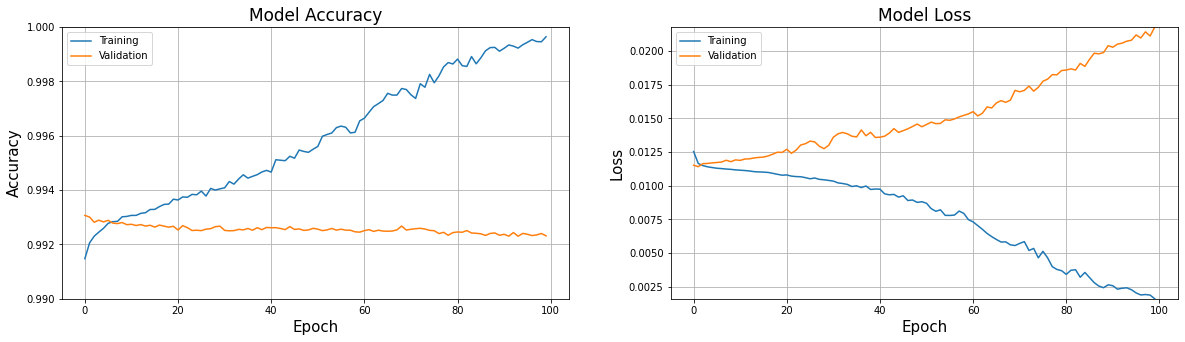

In [85]:
plot_performance(history=history7)

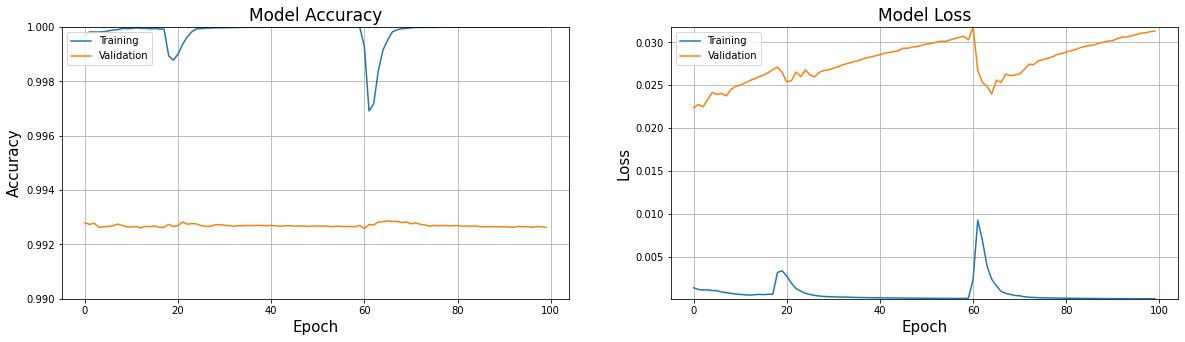

In [87]:
plot_performance(history=history8)

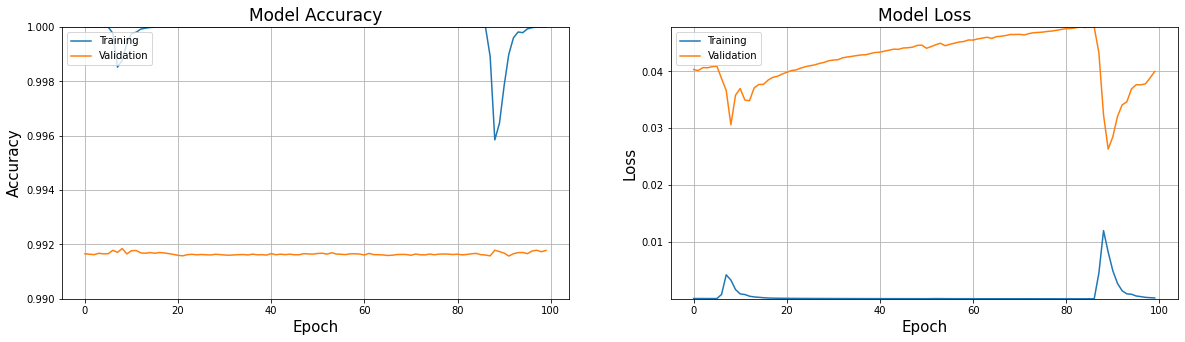

In [88]:
plot_performance(history=history9)

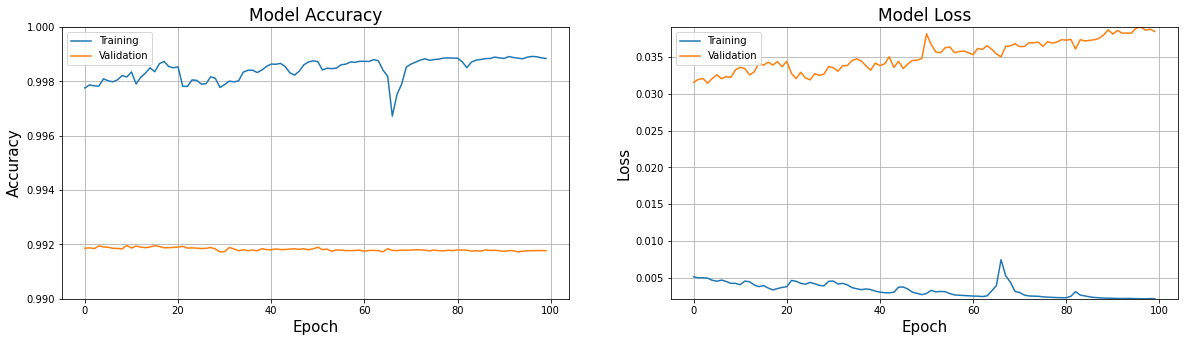

In [90]:
plot_performance(history=history10)

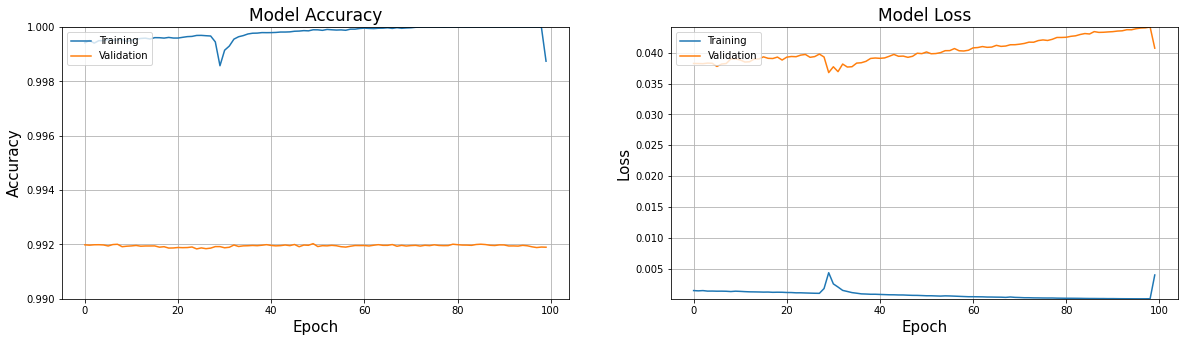

In [92]:
plot_performance(history=history11)

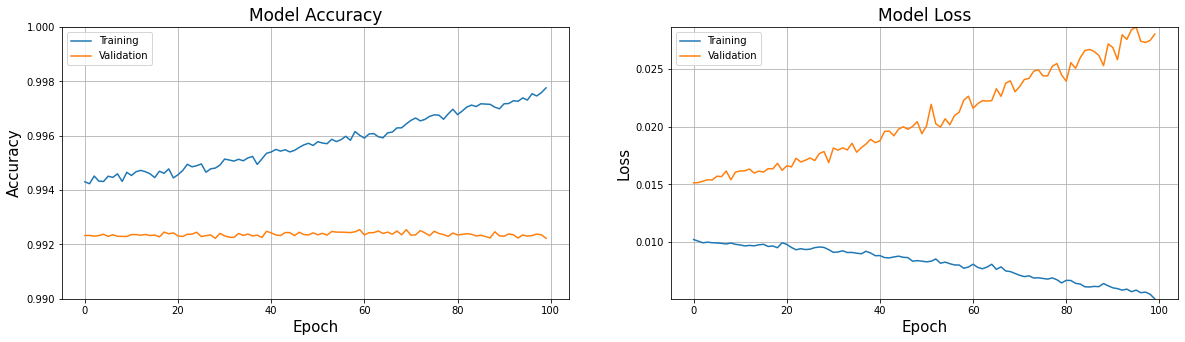

In [94]:
plot_performance(history=history12)